![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicios 02. Métodos Numéricos Básicos II

## C. Periodicidad de las Manchas Solares

En el archivo adjunto llamado 'ManchasSolares.txt' contiene un conjunto de datos con dos columnas: la primera cuenta los meses iniciando en enero de 1749 y la segunda contiene el número de manchas solares mensuales observadas. 

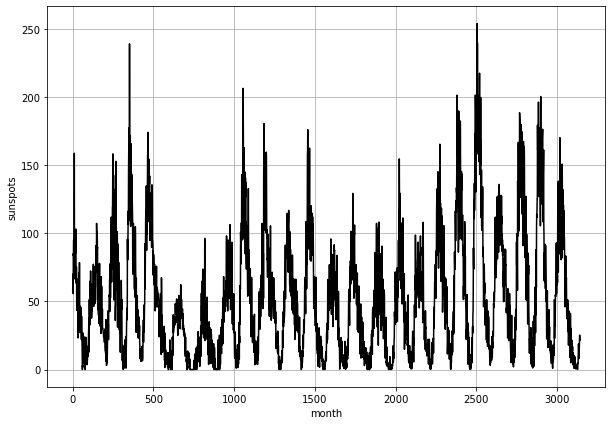

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
month, sunspots = np.loadtxt('ManchasSolares.txt', unpack=True)
plt.figure(figsize=(10,7))
plt.plot(month,sunspots, color='black')
plt.title('')
plt.xlabel(r'month')
plt.ylabel(r'sunspots')
plt.grid()
plt.show()

---

1. Escriba una función que calcule la Transformada Discreta de Fourier (DFT) de los datos leidos y realice un gráfico de la magnitud de los coeficientes de Fourier $\left| c_k \right| ^2$ contra el número $k$. Este gráfico se denomina *Espectro de Potencias* de la señal de manchas solares. Identifique el máximo en el gráfico, el cual corresponde a la frecuencia que presenta la mayor amplitud dentro de la serie de Fourier.

**Solución.**

In [10]:
def DFT(f):
    '''
    Discrete Fourier Transform
    ----------------------------------------
    Arguments:
    f: Points to calculate the DFT
    ----------------------------------------
    Dependeces: NumPy
    ----------------------------------------
    '''
    n = len(f)
    c = np.zeros(n//2+1, complex)
    for k in range(n//2+1):
        for i in range(n):
            c[k] += f[i]*np.exp(-2j*np.pi*k*i/n) 
    return c

c = DFT(sunspots)

Crearemos el Espectro de Potencias en función del número $k$.

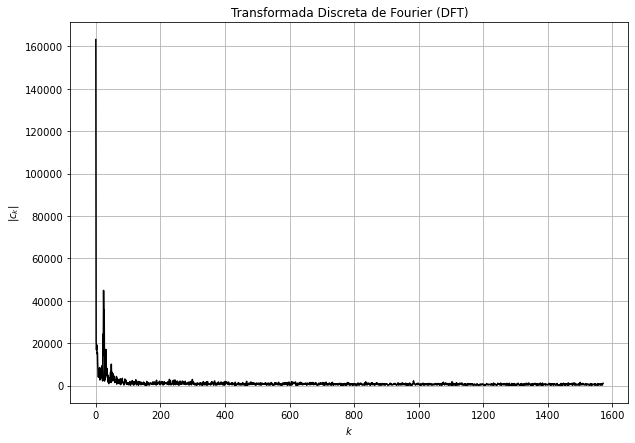

In [11]:
plt.figure(figsize=(10,7))
plt.plot(range(len(c)), abs(c), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| c_k \right|$')
plt.title(r'Transformada Discreta de Fourier (DFT)')
plt.grid()
plt.show()

---
3. Encuente el valor de $k$ correspondiente al máximo y determine el periodo correspondiente a esta frecuencia. El periodo hallado debe ser similar al que estimó a partir de la gráfica de los datos originales.

**Solución**

Encontraremos el número $k$ correspindiente a la máxima contribución en los coeficientes, ignorando el $k=0$,

In [12]:
abs_c = abs(c)
abs_c[0]=0
k_max = np.argmax(abs_c)
k_max

24

El periodo (medido en meses) correspondiente a esta contribución es

In [13]:
n = len(month)
T = n/(k_max)
T

130.95833333333334

o en años,

In [14]:
T/12

10.913194444444445

---
## scipy.fft.ftt()

Una alterniativa para este cálculo se obtiene utilizando la función [scipy.fft.fft()](https://docs.scipy.org/doc/scipy/tutorial/fft.html)

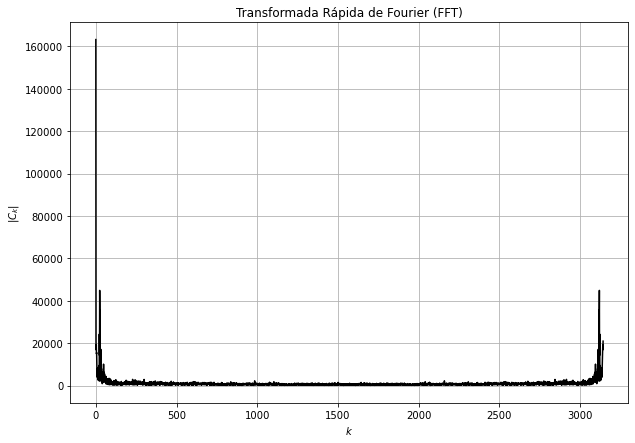

In [15]:
from scipy.fft import fft

C = fft(sunspots)
plt.figure(figsize=(10,7))
plt.plot(range(len(C)), abs(C), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| C_k \right|$')
plt.title(r'Transformada Rápida de Fourier (FFT)')
plt.grid()
plt.show()

In [16]:
C[0] = 0
k_max = np.argmax(abs(C))

n = len(month)
T = n/(k_max)
T

130.95833333333334